In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


In [8]:
def start_plot():
    fig, ax = plt.subplots()
    return (fig, ax)

def parse_duration(hhmmss):
    h, m, s = hhmmss.split(':')
    return np.timedelta64(int(h), 'h') + np.timedelta64(int(m), 'm') + np.timedelta64(int(s), 's')

def parse_high_description(desc):
    if desc.startswith('Serverless'):
        return 'Implementacja Serverless'
    if desc.startswith('Spring'):
        return 'Implementacja Spring'
    if desc.startswith('Load tests - EC2'):
        return 'Implementacja Spring'
    if desc.startswith('High-level'):
        return 'Projektowanie'
    if desc.startswith('Service tests'):
        return 'Testy integracyjne'
    if desc.startswith('Load tests'):
        return 'Testy wydajnościowe'
    if desc.startswith('Dev setup'):
        return 'Konfiguracja repozytorium'
    if desc.startswith('Literature'):
        return 'Analiza literatury'
    return desc    

def to_polish_serverless(desc):
    d = {
        "Serverless API - OpenAPI": "Konfiguracja OpenAPI",
        "Serverless API - aurora": "Konfiguracja wdrożenia",
        "Serverless API - deployment": "Konfiguracja wdrożenia",
        "Serverless API - high-level": "Konfiguracja wdrożenia",
        "Serverless API - implementation": "Implementacja logiki biznesowej",
        "Serverless API - integration tests": "Testy integracyjne",
        "Serverless API - jooq": "Konfiguracja bazy danych w aplikacji",
        "Serverless API - project setup": "Konfiguracja projektu",
    }

    for (k,v) in d.items():
        if desc.startswith(k):
            return v
    return "Skip"

def to_polish_ec2(desc):
    d = {
        "Spring API - Models": "Implementacja logiki biznesowej",
        "Spring API - Photos": "Implementacja logiki biznesowej",
        "Spring API - connect": "Konfiguracja OpenAPI",
        "Spring API - first operation": "Konfiguracja bazy danych w aplikacji",
        "Spring API - project setup": "Konfiguracja projektu",
        "Spring API - service tests": "Testy integracyjne",
        "Load tests - EC2": "Konfiguracja wdrożenia"
    }

    for (k,v) in d.items():
        if desc.startswith(k):
            return v
    return "Skip"

snapshot_date = '2022-12-29'
df = pd.read_csv(f"toggl-entries-{snapshot_date}.csv")
df['Duration'] = df['Duration'].apply(parse_duration)
df['HighDescription'] = df['Description'].apply(parse_high_description)
df['PolishDescription'] = df['Description'].apply(to_polish_serverless)
df['PolishDescriptionEC2'] = df['Description'].apply(to_polish_ec2)


In [9]:
df.groupby('Description')['Duration'].sum()

Description
Dev setup                                                        0 days 02:50:54
High-level design                                                0 days 13:27:15
High-level thinking                                              0 days 01:17:41
High-level thinking - design load tests                          0 days 01:21:33
Literature                                                       0 days 10:56:43
Load tests - EC2 deployment                                      0 days 03:40:53
Load tests - analysis                                            0 days 15:20:19
Load tests - fixing                                              0 days 02:45:40
Load tests - implementation                                      0 days 10:36:35
Load tests - writing                                             0 days 03:11:37
Serverless API - OpenAPI + API Gateway                           0 days 03:44:32
Serverless API - aurora setup                                    0 days 03:00:32
Serverless API -

,HighDescription,Duration,Hours
0,Analiza literatury,0 days 10:56:43,10.945278
1,Implementacja Serverless,0 days 22:46:33,22.775833
2,Implementacja Spring,0 days 12:22:03,12.367500
3,Konfiguracja repozytorium,0 days 02:50:54,2.848333
4,Projektowanie,0 days 16:06:29,16.108056
5,Testy integracyjne,0 days 07:58:56,7.982222
6,Testy wydajnościowe,1 days 07:54:11,31.903056


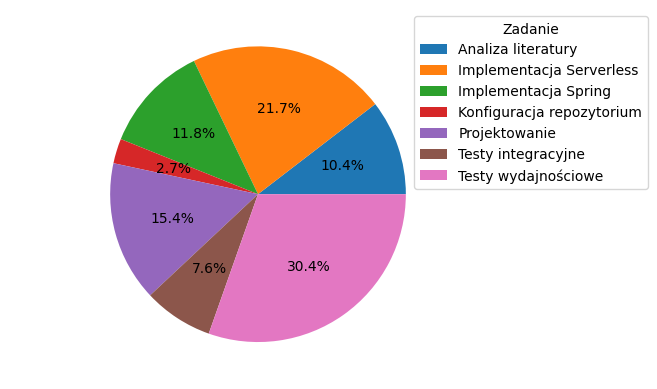

In [10]:
high_descs = df.groupby('HighDescription')['Duration'].sum().reset_index(level=0)
high_descs['Hours'] = high_descs['Duration'].apply(lambda duration: duration / np.timedelta64(1, 's') / 60 / 60)


fig, ax = plt.subplots()
ax.axis("equal")
wedges, texts, autotexts = ax.pie(high_descs['Hours'], autopct='%1.1f%%')
ax.legend(wedges, high_descs['HighDescription'], title="Zadanie", bbox_to_anchor=(0.8, 0, 0.5, 1))

fig.savefig(f"charts/time/{snapshot_date}_overall.png")
high_descs

22.77583333333333

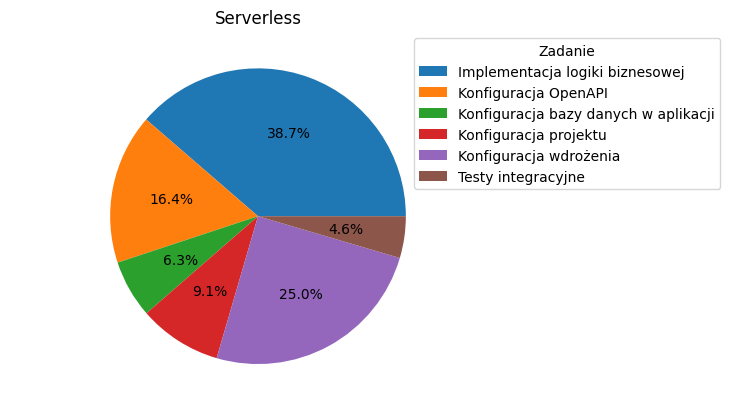

In [11]:
serverless = df.groupby('PolishDescription')['Duration'].sum().reset_index(level=0)
serverless = serverless[serverless['PolishDescription'] != 'Skip']
serverless['Hours'] = serverless['Duration'].apply(lambda duration: duration / np.timedelta64(1, 's') / 60 / 60)

serverless = serverless.sort_values('PolishDescription')

fig, ax = plt.subplots()
ax.axis("equal")
ax.set_title('Serverless')
wedges, texts, autotexts = ax.pie(serverless['Hours'], autopct='%1.1f%%')
ax.legend(wedges, serverless['PolishDescription'], title="Zadanie", bbox_to_anchor=(0.8, 0, 0.5, 1))

serverless.Hours.sum()

,PolishDescriptionEC2,Duration,Hours
0,Implementacja logiki biznesowej,0 days 06:15:58,6.266111
1,Konfiguracja OpenAPI,0 days 00:48:33,0.809167
2,Konfiguracja bazy danych w aplikacji,0 days 01:01:39,1.027500
3,Konfiguracja projektu,0 days 00:08:11,0.136389
4,Konfiguracja wdrożenia,0 days 03:40:53,3.681389
6,Testy integracyjne,0 days 00:26:49,0.446944


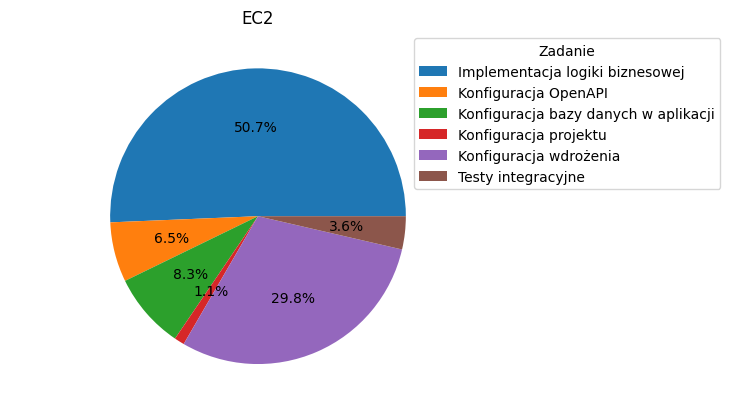

In [12]:
ec2 = df.groupby('PolishDescriptionEC2')['Duration'].sum().reset_index(level=0)
ec2 = ec2[ec2['PolishDescriptionEC2'] != 'Skip']
ec2['Hours'] = ec2['Duration'].apply(lambda duration: duration / np.timedelta64(1, 's') / 60 / 60)

ec2 = ec2.sort_values('PolishDescriptionEC2')


fig, ax = plt.subplots()
ax.axis("equal")
ax.set_title('EC2')
wedges, texts, autotexts = ax.pie(ec2['Hours'], autopct='%1.1f%%')
ax.legend(wedges, ec2['PolishDescriptionEC2'], title="Zadanie", bbox_to_anchor=(0.8, 0, 0.5, 1))

ec2.Hours.sum()
ec2